<a href="https://colab.research.google.com/github/weslei-silva87/Analise-Churn-Classificacao-de-clientes/blob/main/Cassifica%C3%A7ao_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Carregando dados
tabela = pd.read_csv('/content/BankChurners.csv')
tabela.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Renomeando nomes das colunas

tabela = tabela.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes2'})

print("Nomes das colunas depois da renomeação:")
print(tabela.columns)



Nomes das colunas depois da renomeação:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes', 'Naive_Bayes2'],
      dtype='object')


In [ ]:
# verificanso dados nulos
print(tabela.isnull(). sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes                 0
Naive_Bayes2                0
dtype: int64


In [ ]:
# Verificando numeros Duplicados
tabela.duplicated(). sum()

0

In [ ]:
# Verificar os valores únicos dentro da coluna "Attrition_Flag"
attrition_flag = tabela['Attrition_Flag'].unique()

# Exibir os valores únicos
print("Valores únicos na coluna 'Attrition_Flag':")
print(attrition_flag)


Valores únicos na coluna 'Attrition_Flag':
['Existing Customer' 'Attrited Customer']


In [ ]:
# Substituir os valores na coluna 'Attrition_Flag'
tabela['Attrition_Flag'] = tabela['Attrition_Flag'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

# Exibir o DataFrame atualizado
tabela.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes,Naive_Bayes2
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#Verificand tipos de dados
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Reaizando as pimeiras analises
# Exibir a contagem de valores em porcentagem
display((tabela['Attrition_Flag'].value_counts(normalize=True) * 100).round(2))

# 83% Clietes ativos
# 16% Clientes Inativos

1    83.93
0    16.07
Name: Attrition_Flag, dtype: float64

In [ ]:
# Analise mais profunda dos DADOS
import plotly.express as px

#gerando graficos para melhorar analise
for coluna in tabela.columns:
  grafico = px. histogram(tabela, x=coluna, color='Attrition_Flag')
  grafico.show()

Maiores correlações com 'Attrition_Flag':
Attrition_Flag         1.000000
Naive_Bayes            0.999989
Naive_Bayes2           0.999989
Total_Trans_Ct         0.371403
Total_Ct_Chng_Q4_Q1    0.290054
dtype: float64


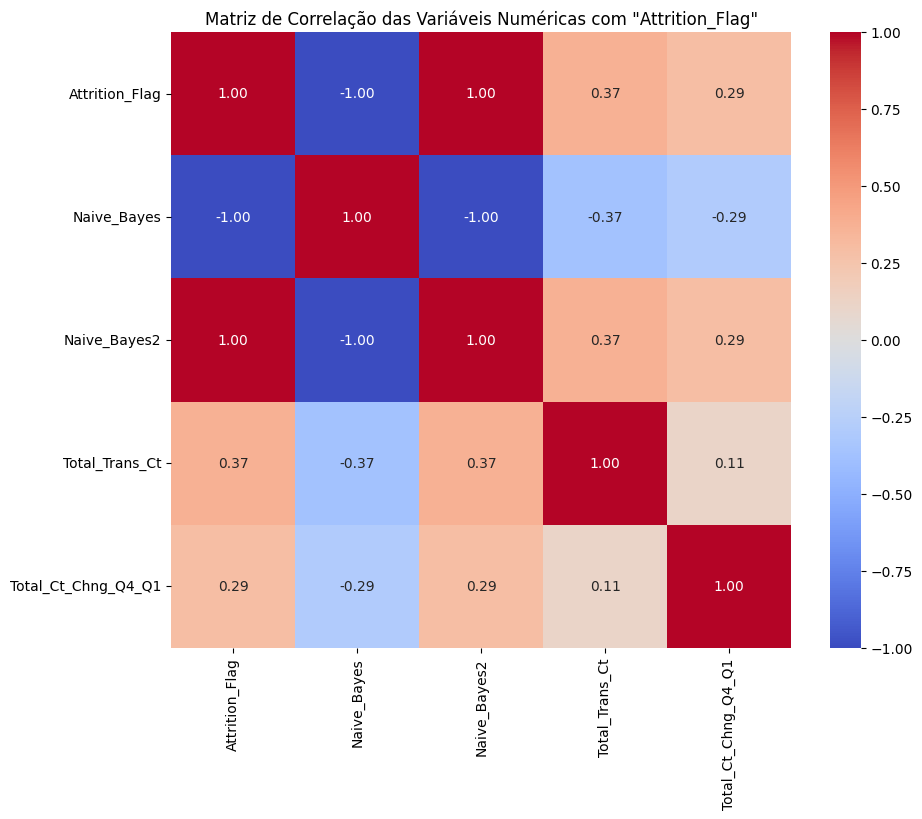

In [ ]:
# Analise de correlação em virtude de clientes

# Selecionar apenas as variáveis numéricas
tabela_numeric = tabela.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação com base em 'Attrition_Flag'
correlation_with_target = tabela_numeric.corrwith(tabela['Attrition_Flag'])

# Ordenar as correlações por valor absoluto
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Selecionar as 5 maiores correlações
top_correlations = correlation_with_target.head(5)

print("Maiores correlações com 'Attrition_Flag':")
print(top_correlations)

# Selecionar as colunas mais correlacionadas
top_columns = top_correlations.index.tolist()

# Plotar a matriz de correlação usando um heatmap para essas colunas
plt.figure(figsize=(10, 8))
sns.heatmap(tabela[top_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas com "Attrition_Flag"')
plt.show()


In [ ]:
# Criando um modelo

# Definindo os dados
y = tabela["Attrition_Flag"]  # Variável alvo
x = tabela.drop(columns=["Attrition_Flag", "CLIENTNUM"])  # Removendo as colunas não utilizadas

# Convertendo colunas categóricas em one-hot encoding
x = pd.get_dummies(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

# Instanciando o classificador Naive Bayes
naive_bayes_classifier = GaussianNB()

# Treinando o classificador
naive_bayes_classifier.fit(x_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsoes = naive_bayes_classifier.predict(x_teste)

# Avaliando a precisão do modelo
precisao = accuracy_score(y_teste, previsoes)
print("Precisão do modelo de Naive Bayes:", precisao)




Precisão do modelo de Naive Bayes: 1.0


In [ ]:
# Verificando e esado o modelo

# Definindo os dados
y = tabela["Attrition_Flag"]  # Variável alvo
x = tabela.drop(columns=["Attrition_Flag", "CLIENTNUM"])  # Removendo as colunas não utilizadas

# Convertendo colunas categóricas em one-hot encoding
x = pd.get_dummies(x)

# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

# Criando os modelos de regressão
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()
modelo_gradient_boosting = GradientBoostingRegressor()

# Treinando os modelos (regressão linear, árvore de decisão e gradient boosting)
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)
modelo_gradient_boosting.fit(x_treino, y_treino)

# Calculando R² (quanto mais próximo de 1, melhor)
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)
previsao_gradient_boosting = modelo_gradient_boosting.predict(x_teste)

# Mostrando resultado
print("R² Regressão Linear:", r2_score(y_teste, previsao_regressao_linear))
print("R² Árvore de Decisão:", r2_score(y_teste, previsao_arvore_decisao))
print("R² Gradient Boosting:", r2_score(y_teste, previsao_gradient_boosting))



R² Regressão Linear: 0.9999799467481406
R² Árvore de Decisão: 1.0
R² Gradient Boosting: 0.9999999992924826


In [ ]:
#verificando a eficiencia do modelo

# Definindo os dados
y = tabela["Attrition_Flag"]  # Variável alvo
x = tabela[["Naive_Bayes", "Naive_Bayes2", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1"]]  # Características

# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

# Instanciando o classificador Naive Bayes
naive_bayes_classifier = GaussianNB()

# Treinando o classificador
naive_bayes_classifier.fit(x_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsoes = naive_bayes_classifier.predict(x_teste)

# Avaliando as métricas do modelo
acuracia = accuracy_score(y_teste, previsoes)
precisao = precision_score(y_teste, previsoes)
revocacao = recall_score(y_teste, previsoes)
pontuacao_f1 = f1_score(y_teste, previsoes)

# Mostrando resultados
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("Pontuação F1:", pontuacao_f1)


Acurácia: 1.0
Precisão: 1.0
Revocação: 1.0
Pontuação F1: 1.0


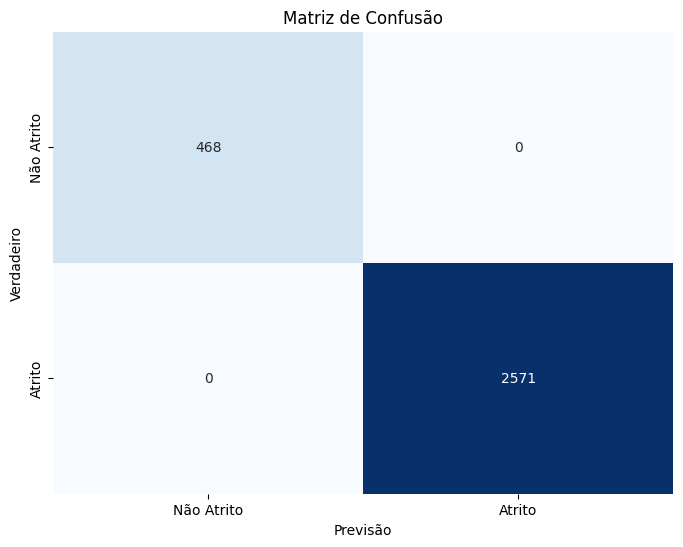

In [ ]:
#Matriz confusao

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes)

# Mostrando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Não Atrito", "Atrito"],
            yticklabels=["Não Atrito", "Atrito"])
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


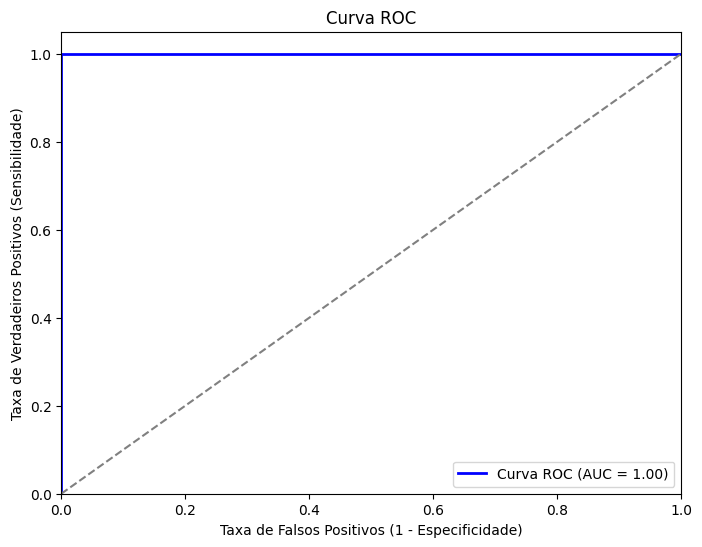

AUC: 1.0


In [ ]:
# Curva ROC

# Calculando as probabilidades previstas para a classe positiva
probabilidades_positivas = naive_bayes_classifier.predict_proba(x_teste)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, probabilidades_positivas)

# Calculando a área sob a curva ROC (AUC)
auc_score = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("AUC:", auc_score)


In [ ]:
# Importância das características

# Instanciando e treinando o classificador RandomForest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_treino, y_treino)

# Obtendo a importância das características
importancias_caracteristicas = random_forest_classifier.feature_importances_

# Criando um DataFrame para visualização
import pandas as pd
importancias_df = pd.DataFrame(importancias_caracteristicas, index=x.columns, columns=['Importância'])
importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

# Mostrando a importância das características
print("Importância das características:")
print(importancias_df)


Importância das características:
                     Importância
Naive_Bayes2            0.547653
Naive_Bayes             0.417933
Total_Trans_Ct          0.030356
Total_Ct_Chng_Q4_Q1     0.004058
